In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Comenzamos con los Dataset de Internet

**Listo los dataset que creo van a ser más útiles.**

Voy a hacer un análisis general del mercado a nivel nacional, me voy a enfocar en datos por habitantes y por provincias. No voy a tener en cuenta hogares ni localidades.

***¿En qué provincias se pueden encontrar oportunidades de inserción?***

=> Acceso a Internet:

*Acceso a Internet_Penetración del Internet fijo por provincia (accesos por cada 100 habitantes).csv

*Acceso a Internet_Penetración del Internet fijo por provincia (accesos por cada 100 hogares).csv


***¿Con qué productos es mejor entrar a los mercados en crecimiento? ¿Qué hay ya en estos mercados? ¿Qué hay en mercados más avanzados?***

=> Acceso a internet por velocidad:

Acceso a Internet_Acceso a Internet Fijo por rangos de velocidad de bajada y provincia.csv


***¿Cómo es la tecnología e infraestructura de estas provincias respecto a las que están más avanzadas?***

=> Acceso a internet por tecnología:

Acceso a Internet_Acceso a Internet fijo por tecnología y provincia.csv


***¿Qué calidad deberá tener el servicio?¿Cuáles son los principales reclamos?***

=> Analizar dataset de reclamos (quiero uno que me diga la evolución de reclamos por tipo de reclamo para internet)

*Denuncias y Reclamos_Reclamos mensuales por tipo de servicio.csv

*Denuncias y Reclamos_Reclamos mensuales recibidos por motivo de reclamo.csv


***=> Relativo a ingresos y economía***

*Acceso a Internet_Ingresos por la operación del servicio de Internet fijo.csv

*cceso a Internet_Indicadores macroeconómicos.csv

**=> Acceso a Internet por Cantidad de Habitantes**

***ETL***

In [3]:
penetracion_internet = pd.read_csv(r'Datasets\Acceso a Internet_Penetración del Internet fijo por provincia (accesos por cada 100 habitantes).csv', sep=',')

In [4]:
penetracion_internet.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2022,3,Buenos Aires,26
1,2022,3,Capital Federal,50
2,2022,3,Catamarca,17
3,2022,3,Chaco,12
4,2022,3,Chubut,26


In [5]:
penetracion_internet.info()
#no hay valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Año                       840 non-null    int64 
 1   Trimestre                 840 non-null    int64 
 2   Provincia                 840 non-null    object
 3   Accesos por cada 100 hab  840 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 26.4+ KB


In [6]:
penetracion_internet.describe()

,Año,Trimestre,Accesos por cada 100 hab
count,840.000000,840.000000,840.000000
mean,2017.885714,2.457143,14.658333
std,2.528745,1.105009,8.989528
min,2014.000000,1.000000,3.000000
25%,2016.000000,1.000000,8.000000
50%,2018.000000,2.000000,13.000000
75%,2020.000000,3.000000,19.000000
max,2022.000000,4.000000,52.000000


***EDA***

***¿Cuál es la evolución a lo largo de los trimestres?***

C:\Users\Windows\AppData\Local\Temp\ipykernel_3136\882997826.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grouped['Año'].astype(str) + 'T' + grouped['Trimestre'].astype(str), rotation=270)


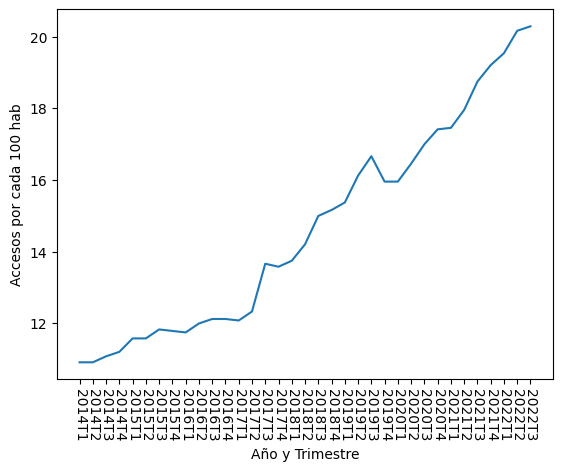

In [7]:
# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots()

# Agrupar los datos por año y trimestre y calcular el promedio de los accesos
grouped = penetracion_internet.drop(columns='Provincia') #si no elimino este campo no puedo agregar los datos en años y trimestres.
grouped = grouped.groupby(['Año', 'Trimestre']).mean().reset_index()

# Crear el gráfico de barras
ax.plot(
    grouped['Año'].astype(str) + 'T' + grouped['Trimestre'].astype(str),
    grouped['Accesos por cada 100 hab']
)

# Configurar las etiquetas del eje x
ax.set_xticklabels(grouped['Año'].astype(str) + 'T' + grouped['Trimestre'].astype(str), rotation=270)

# Configurar los títulos de los ejes
ax.set_xlabel('Año y Trimestre')
ax.set_ylabel('Accesos por cada 100 hab')

# Mostrar el gráfico
plt.show()

Se ve que en los últimos 8 años se duplicó el acceso a internet.

¿Qué tan saturado está el mercado? => SERÍA BUENO ANALIZAR LOS DATOS DE ACCESO POR CADA 100 HOGARES.

***¿Cómo se distribuyen los datos de acuerdo a las provincias, de acuerdo al último dato registrado (2022T3)?***

C:\Users\Windows\AppData\Local\Temp\ipykernel_3136\3869719151.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_filtrado['Provincia'], rotation=90)


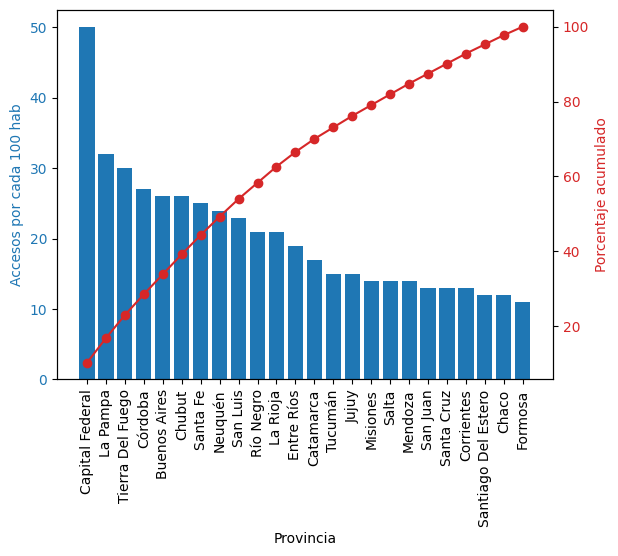

In [8]:

# Filtrar el dataframe por el último dato registrado (Año = 2022, Trimestre = 3)
filtro = (penetracion_internet['Año'] == 2022) & (penetracion_internet['Trimestre'] == 3)
df_filtrado = penetracion_internet.loc[filtro]

# Ordenar el dataframe filtrado en orden descendente por los accesos por cada 100 habitantes
df_filtrado = df_filtrado.sort_values('Accesos por cada 100 hab', ascending=False)

# Calcular el porcentaje acumulado de los accesos por cada 100 habitantes
df_filtrado['Porcentaje acumulado'] = (df_filtrado['Accesos por cada 100 hab'].cumsum() / df_filtrado['Accesos por cada 100 hab'].sum()) * 100

# Crear el gráfico de Pareto
fig, ax1 = plt.subplots()

# Barras para los accesos por cada 100 habitantes
ax1.bar(df_filtrado['Provincia'], df_filtrado['Accesos por cada 100 hab'], color='tab:blue')

# Configurar los títulos y etiquetas de los ejes
ax1.set_xlabel('Provincia')
ax1.set_ylabel('Accesos por cada 100 hab', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Segundo eje y para el porcentaje acumulado
ax2 = ax1.twinx()
ax2.plot(df_filtrado['Provincia'], df_filtrado['Porcentaje acumulado'], color='tab:red', marker='o')

# Configurar las etiquetas del segundo eje y
ax2.set_ylabel('Porcentaje acumulado', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Rotar las etiquetas del eje x en 270 grados
ax1.set_xticklabels(df_filtrado['Provincia'], rotation=90)

# Mostrar el gráfico
plt.show()

Como era de esperar, Capital Federal es, por lejos, el distrito con mayor acceso a internet.

En lo personal me sorprende que Buenos Aires, Córdoba y Santa Fe estén por detrás de La Pampa y Tierra del Fuego.

***ANALISIS DE LA PENETRACIÓN DE ACCESOS A INTERNET CADA 100 HOGARES****

Nos permitirá saber que tan saturado está el mercado.

In [9]:
penetracion_internet_hogares = pd.read_csv(r'Datasets\Acceso a Internet_Penetración del Internet fijo por provincia (accesos por cada 100 hogares).csv')
penetracion_internet_hogares.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,"78,11"
1,2022,3,Capital Federal,"122,28"
2,2022,3,Catamarca,"65,33"
3,2022,3,Chaco,"43,86"
4,2022,3,Chubut,"84,38"


In [10]:
penetracion_internet_hogares.info()
#no hay datos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.4+ KB


In [11]:
#Reemplazo ',' por '.' en Accesos por cada 100 hogares para luego convertir a int
penetracion_internet_hogares['Accesos por cada 100 hogares'] = penetracion_internet_hogares['Accesos por cada 100 hogares'].str.replace(',', '.')
penetracion_internet_hogares['Accesos por cada 100 hogares'] = penetracion_internet_hogares['Accesos por cada 100 hogares'].astype(float)
penetracion_internet_hogares.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,78.11
1,2022,3,Capital Federal,122.28
2,2022,3,Catamarca,65.33
3,2022,3,Chaco,43.86
4,2022,3,Chubut,84.38


In [12]:
penetracion_internet_hogares.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,840.000000,840.000000,840.000000
mean,2017.885714,2.457143,49.065750
std,2.528745,1.105009,23.151885
min,2014.000000,1.000000,9.350000
25%,2016.000000,1.000000,32.107500
50%,2018.000000,2.000000,45.900000
75%,2020.000000,3.000000,61.865000
max,2022.000000,4.000000,124.060000


***¿Cuál es la evolución a lo largo de los trimestres?***

C:\Users\Windows\AppData\Local\Temp\ipykernel_3136\267272302.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grouped['Año'].astype(str) + 'T' + grouped['Trimestre'].astype(str), rotation=270)


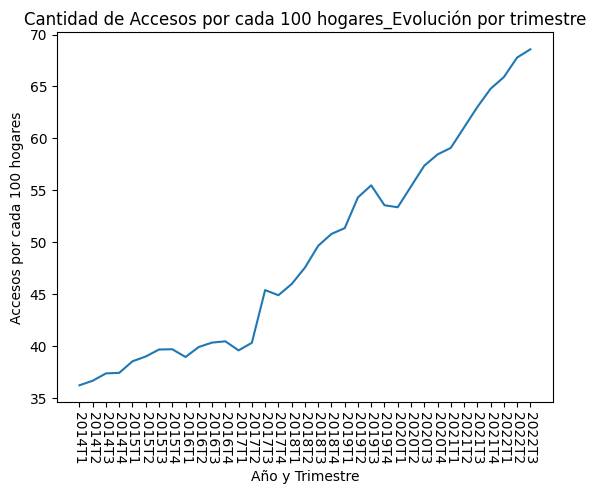

In [14]:
# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots()

# Agrupar los datos por año y trimestre y calcular el promedio de los accesos
grouped = penetracion_internet_hogares.drop(columns='Provincia') #si no elimino este campo no puedo agregar los datos en años y trimestres.
grouped = grouped.groupby(['Año', 'Trimestre']).mean().reset_index()

# Crear el gráfico de barras
ax.plot(
    grouped['Año'].astype(str) + 'T' + grouped['Trimestre'].astype(str),
    grouped['Accesos por cada 100 hogares']
)

# Configurar las etiquetas del eje x
ax.set_xticklabels(grouped['Año'].astype(str) + 'T' + grouped['Trimestre'].astype(str), rotation=270)

# Configurar los títulos de los ejes
ax.set_xlabel('Año y Trimestre')
ax.set_ylabel('Accesos por cada 100 hogares')
ax.set_title('Cantidad de Accesos por cada 100 hogares_Evolución por trimestre')

# Mostrar el gráfico
plt.show()



Al igual que el gráfico de habitantes, en los últimos 8 años se duplicó la contidad de hogares con acceso a internet.

También podemos concluir que el 70% de los hogares en Argentina tienen internet.

Pero cabe preguntar que pasa en cada provincia, ¿habrá algún distrito con baja penetración para aprovechar una inserción temprana al mercado?

VEAMOS

C:\Users\Windows\AppData\Local\Temp\ipykernel_3136\3616394471.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_filtrado['Provincia'], rotation=90)


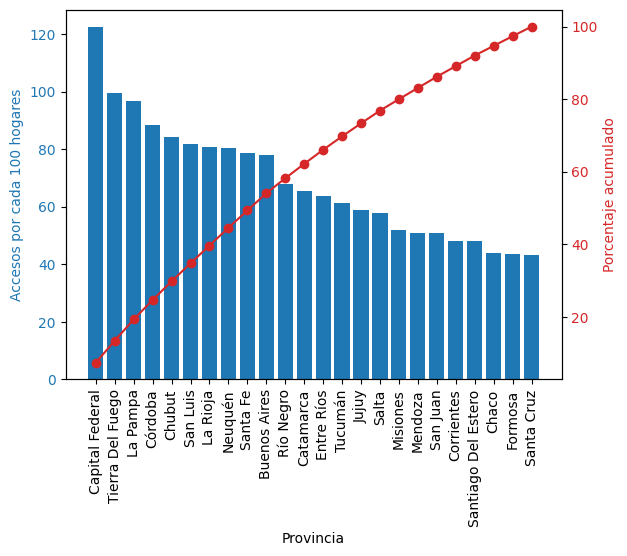

In [15]:
# Filtrar el dataframe por el último dato registrado (Año = 2022, Trimestre = 3)
filtro = (penetracion_internet_hogares['Año'] == 2022) & (penetracion_internet_hogares['Trimestre'] == 3)
df_filtrado = penetracion_internet_hogares.loc[filtro]

# Ordenar el dataframe filtrado en orden descendente por los accesos por cada 100 habitantes
df_filtrado = df_filtrado.sort_values('Accesos por cada 100 hogares', ascending=False)

# Calcular el porcentaje acumulado de los accesos por cada 100 habitantes
df_filtrado['Porcentaje acumulado'] = (df_filtrado['Accesos por cada 100 hogares'].cumsum() / df_filtrado['Accesos por cada 100 hogares'].sum()) * 100

# Crear el gráfico de Pareto
fig, ax1 = plt.subplots()

# Barras para los accesos por cada 100 habitantes
ax1.bar(df_filtrado['Provincia'], df_filtrado['Accesos por cada 100 hogares'], color='tab:blue')

# Configurar los títulos y etiquetas de los ejes
ax1.set_xlabel('Provincia')
ax1.set_ylabel('Accesos por cada 100 hogares', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Segundo eje y para el porcentaje acumulado
ax2 = ax1.twinx()
ax2.plot(df_filtrado['Provincia'], df_filtrado['Porcentaje acumulado'], color='tab:red', marker='o')

# Configurar las etiquetas del segundo eje y
ax2.set_ylabel('Porcentaje acumulado', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Rotar las etiquetas del eje x en 90 grados
ax1.set_xticklabels(df_filtrado['Provincia'], rotation=90)

# Mostrar el gráfico
plt.show()

El gráfico muestra mercados, en teoría, saturados (por encima del 70%, media nacional).

En el otro extremo, se ven mercados con relativamente baja accesibilidad como son Santa Cruz, Formosa, Chaco, Santiago de Estero y Corrientes. Estos podrían ser un buen punto de partida para una investigación más profunda de mercado.

A su vez, es de destacar que Formosa, Chaco, Corrientes y Santiago del Estero son provincias muy cercanas. Con lo cual, el desarrollo de una podría favorecer el auge del acceso a internet en las otras.

*SERÍA BUENO VER LA EVOLUCIÓN DE LOS ACCESOS CADA 100 HOGARES EN ESTAS 4 PROVINCIAS.*

In [16]:
# Filtrar el dataframe por las provincias de interés
provincias_interes = ['Formosa', 'Chaco', 'Corrientes', 'Santiago Del Estero']
#provincias_interes = penetracion_internet_hogares['Provincia'].unique()
df_filtrado = penetracion_internet_hogares[penetracion_internet_hogares['Provincia'].isin(provincias_interes)]

In [17]:
df_filtrado = df_filtrado.sort_values(by=['Año', 'Trimestre'], ascending=[True, True])

In [18]:
df_filtrado

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
819,2014,1,Chaco,20.72
822,2014,1,Corrientes,22.32
824,2014,1,Formosa,17.42
837,2014,1,Santiago Del Estero,16.31
795,2014,2,Chaco,20.96
...,...,...,...,...
45,2022,2,Santiago Del Estero,47.70
3,2022,3,Chaco,43.86
6,2022,3,Corrientes,48.21
8,2022,3,Formosa,43.76


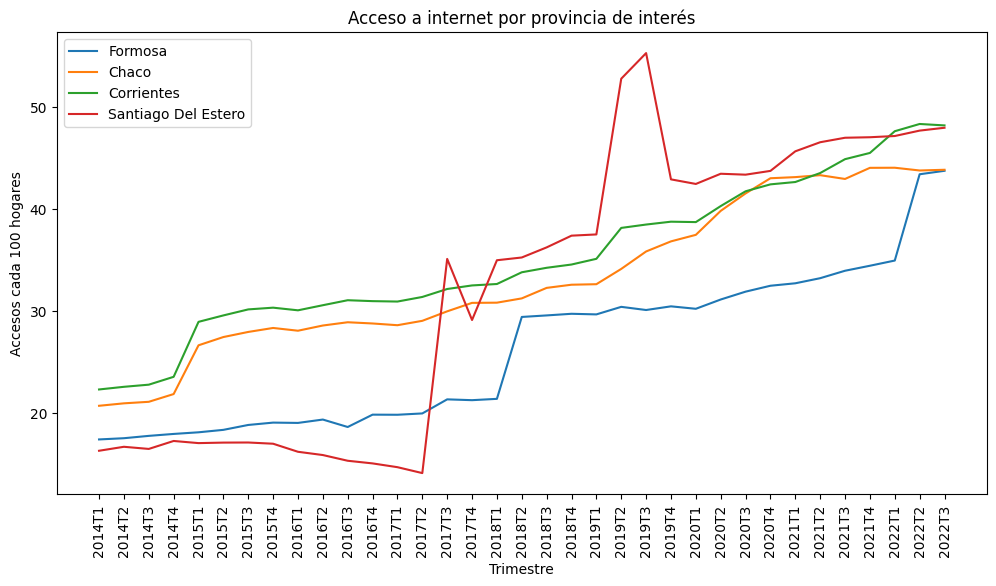

In [25]:
plt.figure(figsize=(12,6))

for provincia in provincias_interes:
    df_provincia = df_filtrado[df_filtrado['Provincia'] == provincia]
    x = df_provincia['Año'].astype(str) + 'T' + df_provincia['Trimestre'].astype(str)
    y = df_provincia['Accesos por cada 100 hogares']
    plt.plot(x,y,label=provincia)

plt.legend()
plt.title('Acceso a internet por provincia de interés')
plt.xlabel('Trimestre')
plt.ylabel('Accesos cada 100 hogares')
plt.xticks(rotation=90)

plt.show()

Se puede ver que los hogares con acceso a internet están en plena expansión.

En Chaco y Corrientes se fue casi al doble. En el caso de Formosa y Santiago Del Estero aumentó más del 400%.

**=> Acceso a internet por velocidad**

¿Con qué productos es mejor entrar a los mercados en crecimiento? ¿Qué hay ya en estos mercados? ¿Qué hay en mercados más avanzados?

***ETL***

In [20]:
rangos_vel_bajada = pd.read_csv(r'Datasets\Acceso a Internet_Acceso a Internet Fijo por rangos de velocidad de bajada y provincia.csv', sep=',')

In [21]:
rangos_vel_bajada.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29.985,27.709,290.315,297.915,267.044,124.190,3.618.689,65.821,4.721.668
1,2022,3,Capital Federal,517.000,5.742,34.371,67.829,51.946,28.692,1.253.105,105.477,1.547.679
2,2022,3,Catamarca,71.000,384.000,3.107,5.389,5.099,3.737,50.298,2.208,70.293
3,2022,3,Chaco,461.000,987.000,16.782,18.938,8.049,15.828,79.390,3.711,144.146
4,2022,3,Chubut,109.000,1.444,45.707,30.940,34.682,15.309,17.563,20.024,165.778


In [22]:
rangos_vel_bajada.info()
#Algunas columnas son object cuando deberían ser float. Es que los puntos están funcionando como separadores de miles. Por lo tanto, los tengo que eliminar para que pasen a valores enteros.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  840 non-null    int64  
 1   Trimestre            840 non-null    int64  
 2   Provincia            840 non-null    object 
 3   HASTA 512 kbps       840 non-null    float64
 4   + 512 Kbps - 1 Mbps  840 non-null    float64
 5   + 1 Mbps - 6 Mbps    840 non-null    object 
 6   + 6 Mbps - 10 Mbps   840 non-null    float64
 7   + 10 Mbps - 20 Mbps  840 non-null    float64
 8   + 20 Mbps - 30 Mbps  840 non-null    float64
 9   + 30 Mbps            840 non-null    object 
 10  OTROS                834 non-null    float64
 11  Total                840 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 78.9+ KB


In [23]:
columnas = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps',
            '+ 30 Mbps', 'OTROS' ]

In [27]:
for col in columnas:
    rangos_vel_bajada[col] = rangos_vel_bajada[col].replace("nan", '0')    
    rangos_vel_bajada[col] = rangos_vel_bajada[col].astype(str).str.replace('.', '')
    rangos_vel_bajada[col] = pd.to_numeric(rangos_vel_bajada[col], downcast='integer')

In [28]:
rangos_vel_bajada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Año                  840 non-null    int64 
 1   Trimestre            840 non-null    int64 
 2   Provincia            840 non-null    object
 3   HASTA 512 kbps       840 non-null    int32 
 4   + 512 Kbps - 1 Mbps  840 non-null    int32 
 5   + 1 Mbps - 6 Mbps    840 non-null    int32 
 6   + 6 Mbps - 10 Mbps   840 non-null    int32 
 7   + 10 Mbps - 20 Mbps  840 non-null    int32 
 8   + 20 Mbps - 30 Mbps  840 non-null    int32 
 9   + 30 Mbps            840 non-null    int32 
 10  OTROS                840 non-null    int32 
 11  Total                840 non-null    object
dtypes: int32(8), int64(2), object(2)
memory usage: 52.6+ KB


In [29]:
rangos_vel_bajada = rangos_vel_bajada.sort_values(by=['Año','Trimestre'], ascending=True)
rangos_vel_bajada.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
816,2014,1,Buenos Aires,8469,171244,2279875,121787,38923,2060,4037,0,2.624.542
817,2014,1,Capital Federal,8520,88826,1096050,70293,38798,550,6208,0,1.301.081
818,2014,1,Catamarca,190,9147,13330,1672,640,0,0,0,24.232
819,2014,1,Chaco,4380,15849,40869,4644,7410,50,0,0,62.546
820,2014,1,Chubut,7452,100,61329,0,0,0,0,0,68.791


In [30]:
rangos_vel_bajada.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS
count,840.000000,840.000000,840.000000,840.000000,8.400000e+02,840.000000,840.000000,840.000000,8.400000e+02,840.000000
mean,2017.885714,2.457143,2898.440476,10374.467857,1.509700e+05,33783.186905,34638.141667,19442.944048,7.917956e+04,4898.216667
std,2.528745,1.105009,10900.554628,21587.794231,3.481538e+05,60759.295096,87389.351535,70347.380887,3.426234e+05,12102.988402
min,2014.000000,1.000000,60.000000,0.000000,2.842000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.000000
25%,2016.000000,1.000000,320.000000,1347.000000,2.853925e+04,2967.750000,2039.500000,190.000000,7.000000e+00,0.000000
50%,2018.000000,2.000000,1050.000000,3760.500000,4.883450e+04,8303.500000,7766.000000,2214.500000,8.825000e+02,0.000000
75%,2020.000000,3.000000,2565.750000,8328.250000,8.689750e+04,29956.000000,24396.500000,9284.000000,1.966075e+04,5094.000000
max,2022.000000,4.000000,199768.000000,171244.000000,2.299705e+06,403575.000000,886678.000000,949093.000000,3.618689e+06,120464.000000


***EDA***

¿Cómo evolucionó cada rango de velocidad a lo largo del tiempo?

In [31]:
def grafico_evolucion(df, columnas, eje_x, eje_y, titulo):
    df_aux = df.drop(columns='Provincia')

    df_aux['Año'] = df_aux['Año'].astype(str)
    df_aux['Trimestre'] = df_aux['Trimestre'].astype(str)
    df_aux['Año-Trimestre'] = df_aux['Año'] + '-T' + df_aux['Trimestre']

    df_aux = df_aux.drop(columns=['Año', 'Trimestre', 'Total'])

    df_aux = df_aux.groupby(['Año-Trimestre'], as_index=False).sum()

    # Crear el gráfico
    plt.figure(figsize=(10, 6))

    # Recorrer las columnas numéricas y trazar las series en el gráfico
    for col in columnas:
        plt.plot(df_aux['Año-Trimestre'], df_aux[col], label=col)


    # Personalizar el gráfico
    plt.xlabel(eje_x)
    plt.ylabel(eje_y)
    plt.title(titulo)
    plt.legend()
    plt.xticks(rotation=90)


    # Mostrar el gráfico
    return plt.show()

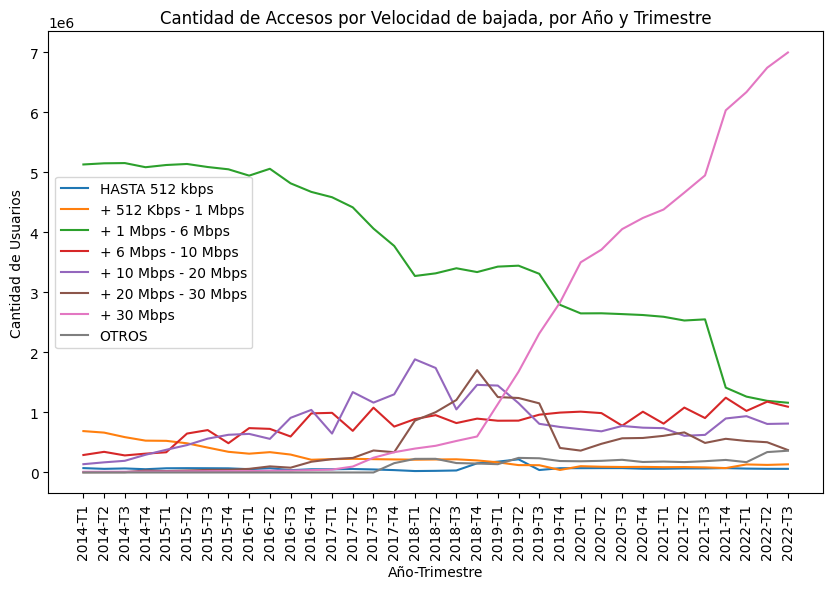

In [69]:
grafico_evolucion(rangos_vel_bajada, columnas, 'Año-Trimestre', 'Cantidad de Usuarios', 'Cantidad de Accesos por Velocidad de bajada, por Año y Trimestre')

En el gráfico se ve claramente la tendencia a velocidades mayores.

A medida que avanza el tiempo, las velocidades de + 30 Mbps son de uso cada vez más frecuentes, principalmente, a partir del 2019.

Por el contrario, las velocidades bajas que, años anteriores dominaban el mercado, van en tendencia a desaparecer.

*Veamos que está pasando en las provincias seleccionadas*

In [33]:
print(provincias_interes)

['Formosa', 'Chaco', 'Corrientes', 'Santiago Del Estero']


In [34]:
# Filtro los DF por las provincias que quiero
df_formosa = rangos_vel_bajada[rangos_vel_bajada['Provincia'] == 'Formosa']
df_chaco = rangos_vel_bajada[rangos_vel_bajada['Provincia'] == 'Chaco']
df_corrientes = rangos_vel_bajada[rangos_vel_bajada['Provincia'] == 'Corrientes']
df_santiago = rangos_vel_bajada[rangos_vel_bajada['Provincia'] == 'Santiago Del Estero']

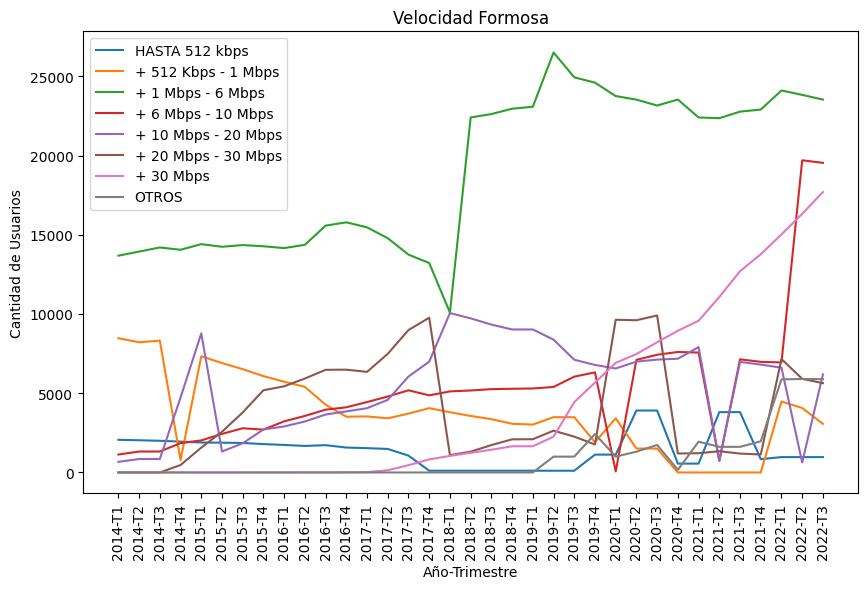

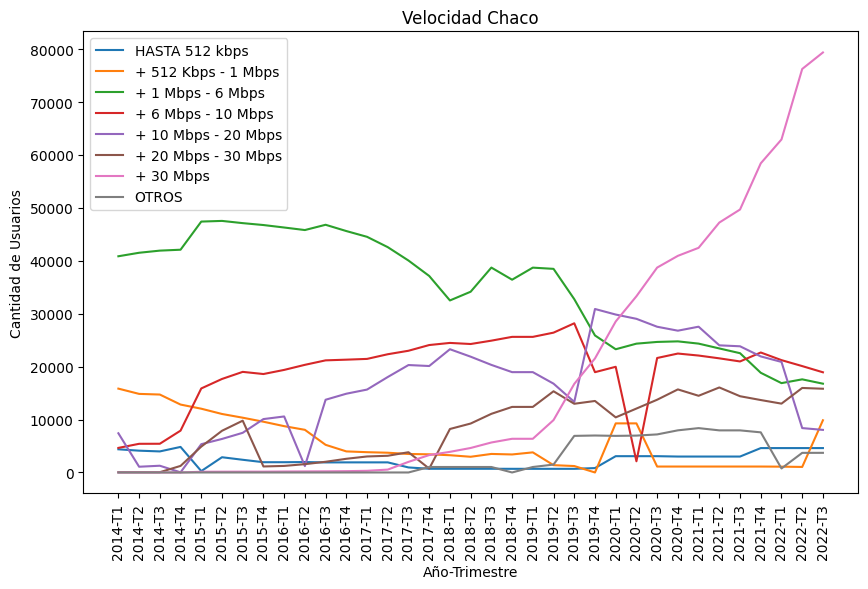

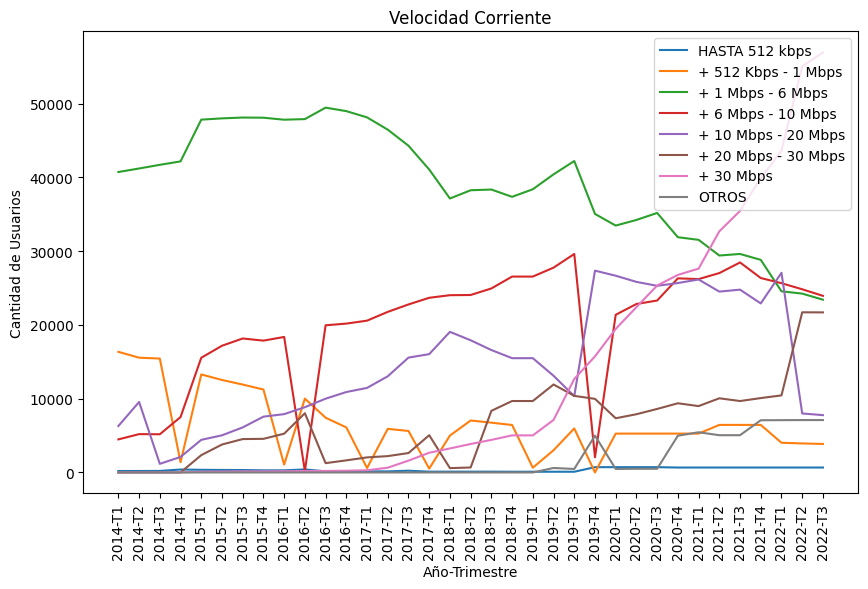

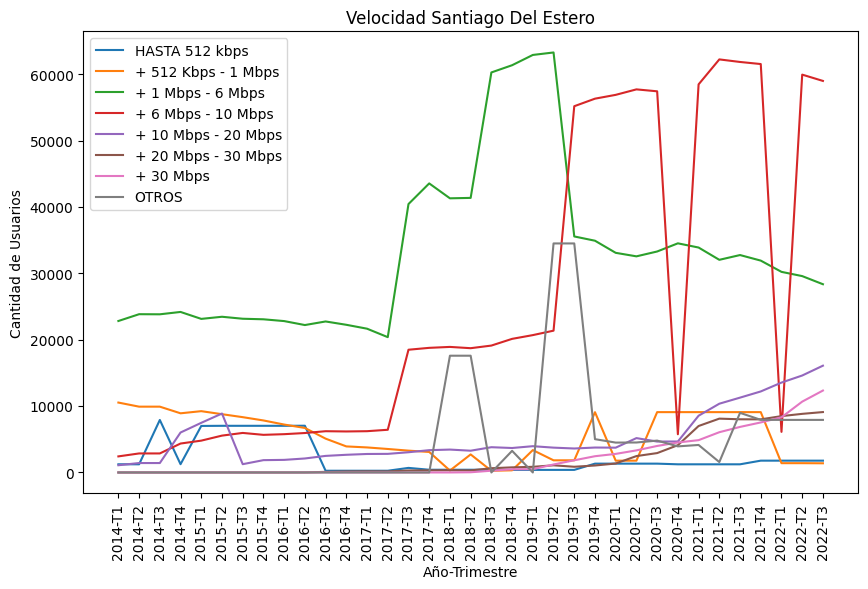

In [35]:
grafico_evolucion(df_formosa, columnas, 'Año-Trimestre', 'Cantidad de Usuarios', 'Velocidad Formosa')
grafico_evolucion(df_chaco, columnas, 'Año-Trimestre', 'Cantidad de Usuarios', 'Velocidad Chaco')
grafico_evolucion(df_corrientes, columnas, 'Año-Trimestre', 'Cantidad de Usuarios', 'Velocidad Corriente')
grafico_evolucion(df_santiago, columnas, 'Año-Trimestre', 'Cantidad de Usuarios', 'Velocidad Santiago Del Estero')


En las gráficas individuales se ve que en Chaco y Corrientes el boom del internet a alta velocidad (+30Mbps) comenzó en 2019 acompañando la tendencia general.

En cambio, para Formosa y Santiago del Estero aún no explotó el segmento de velocidades superiores a 30 Mbps, aún predominan las velocidades bajas.

**=> Acceso a internet por tecnología:**

¿Puedo llevar servicios más avanzados a las provincias en crecimiento? ¿Cómo es la tecnología e infraestructura de estas provincias respecto a las que están más avanzadas?

***ETL***

In [36]:
tecnologias = pd.read_csv(r'Datasets\Acceso a Internet_Acceso a Internet fijo por tecnología y provincia.csv', sep=',')
tecnologias.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339.648,2.748.325,1.436.433,126.846,70.416,4.721.668
1,2022,3,Capital Federal,140.791,1.240.125,129.218,5.758,31.787,1.547.679
2,2022,3,Catamarca,10.010,10.495,46.224,1.329,2.235,70.293
3,2022,3,Chaco,27.164,61.800,44.645,8.178,2.359,144.146
4,2022,3,Chubut,45.377,72.212,9.574,29.784,8.831,165.778


In [37]:
tecnologias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           841 non-null    object 
 1   Trimestre     841 non-null    object 
 2   Provincia     840 non-null    object 
 3   ADSL          840 non-null    object 
 4   Cablemodem    840 non-null    object 
 5   Fibra óptica  840 non-null    object 
 6   Wireless      840 non-null    float64
 7   Otros         840 non-null    float64
 8   Total         840 non-null    object 
dtypes: float64(2), object(7)
memory usage: 59.3+ KB


In [38]:
#elimino los valores nulos
tecnologias.dropna(inplace=True)

In [39]:
#ValueError: Unable to parse string "2019 *" at position 288
tecnologias.iloc[287:350]

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
287,2019,4,Tucumán,146.985,11.012,39.574,725.000,348.000,198.644
288,2019 *,3 *,Buenos Aires,1.277.249,2.144.956,425.386,85.572,27.070,3.960.233
289,2019 *,3 *,Capital Federal,300.288,1.080.973,24.900,3.895,31.155,1.441.211
290,2019 *,3 *,Catamarca,24.349,5.543,13,244.000,2.251,32.400
291,2019 *,3 *,Chaco,50.416,49.156,8.063,5.224,1.592,114.451
...,...,...,...,...,...,...,...,...,...
345,2019 *,1 *,Jujuy,33.248,12.484,153,640.000,43.622,90.147
346,2019 *,1 *,La Pampa,18.832,57.373,2.891,9.023,1.041,89.160
347,2019 *,1 *,La Rioja,16.367,34.984,12,252.000,41.000,51.656
348,2019 *,1 *,Mendoza,148.524,40.205,5.662,10.363,1.544,206.298


In [40]:
reemplazos = {
    '2019 *': '2019',
    '2020 *': '2020',
    '2021 *': '2021',
    '2022 *': '2022'
}

tecnologias['Año'] = tecnologias['Año'].replace(reemplazos)


In [41]:
reemplazos_trim = {
    '1 *': '1',
    '2 *': '2',
    '3 *': '3',
    '4 *': '4'
}

tecnologias['Trimestre'] = tecnologias['Trimestre'].replace(reemplazos_trim)

In [42]:
#elimino los puntos y convierto los campos a int
columna_tec = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

for col in columna_tec:
    tecnologias[col] = tecnologias[col].astype(str).str.replace('.','')
    tecnologias[col] = pd.to_numeric(tecnologias[col], downcast='integer')

In [43]:
tecnologias = tecnologias.sort_values(by=['Año', 'Trimestre'], ascending=True)

In [44]:
tecnologias.describe()

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros
count,8.400000e+02,8.400000e+02,8.400000e+02,840.000000,840.000000
mean,1.275668e+05,1.717750e+05,2.991186e+04,9937.419048,6603.879762
std,2.550543e+05,4.221661e+05,1.235013e+05,17564.217475,10132.970568
min,6.842000e+03,0.000000e+00,0.000000e+00,0.000000,13.000000
25%,2.247925e+04,8.599750e+03,1.860000e+02,1158.500000,772.500000
50%,4.859600e+04,3.498400e+04,1.093000e+03,4262.000000,2734.500000
75%,1.045695e+05,7.074850e+04,1.386250e+04,11333.500000,7546.500000
max,1.586343e+06,2.748325e+06,1.436433e+06,126887.000000,73415.000000


***EDA***

¿Cómo evoució cada tecnología a lo largo del tiempo?

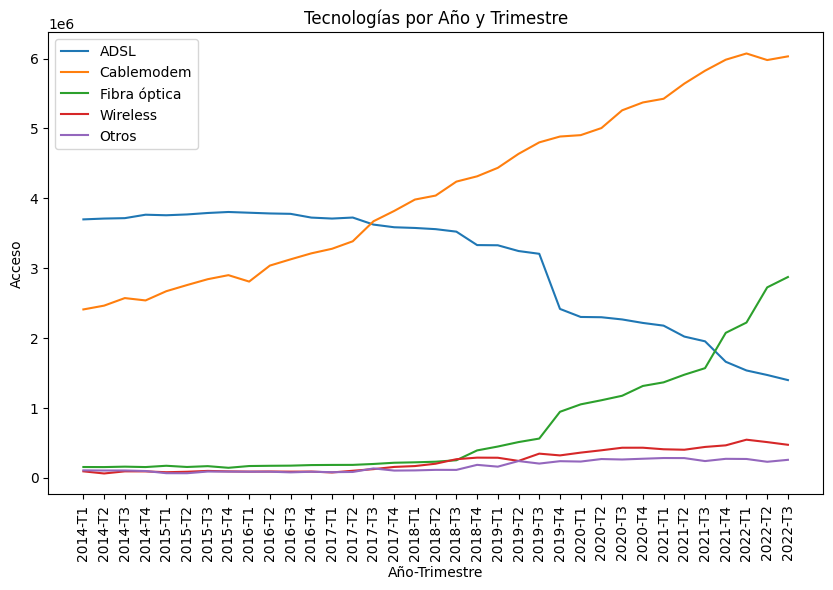

In [45]:
grafico_evolucion(tecnologias, columna_tec, 'Año-Trimestre', 'Acceso', 'Tecnologías por Año y Trimestre')

Aquí se cómo las tecnologías de Cablemodem y Fibra óptica, tecnologías asociadas a velocidades más altas, están creciendo.

Esto guarda relación con lo analizado antes en cuanto al crecimiento de las altas velocidades.

Aquí un cuadro comparativo de las tecnologías y los rangos de velocidad que proveen.

| Tecnología      | Velocidad (Mbps)            |
| --------------- | --------------------------- |
| ADSL            | 2-24 Mbps                   |
| Cablemódem      | 10-1000 Mbps                |
| Fibra óptica    | 100-1000 Mbps (o más)       |
| Wireless        | 1-100 Mbps                  |


*Revisemos la evolución de estas tecnologías en las provincias de interes:*

In [46]:
# Filtro los DF por las provincias que quiero
df_formosa_tec = tecnologias[tecnologias['Provincia'] == 'Formosa']
df_chaco_tec = tecnologias[tecnologias['Provincia'] == 'Chaco']
df_corrientes_tec = tecnologias[tecnologias['Provincia'] == 'Corrientes']
df_santiago_tec = tecnologias[tecnologias['Provincia'] == 'Santiago Del Estero']

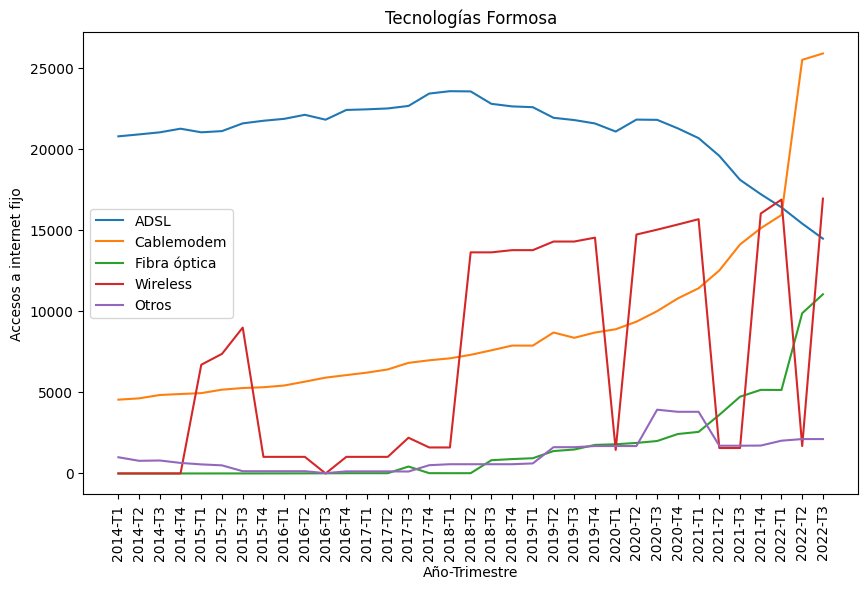

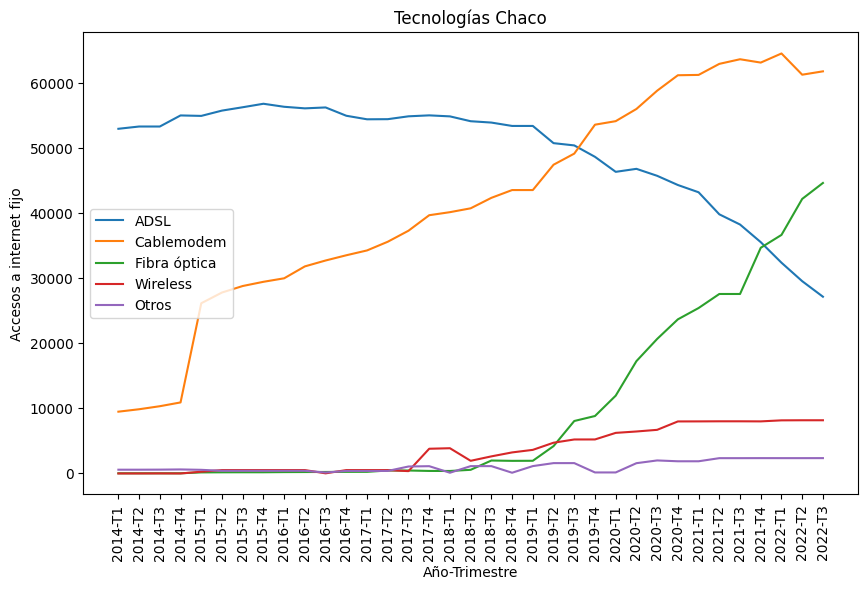

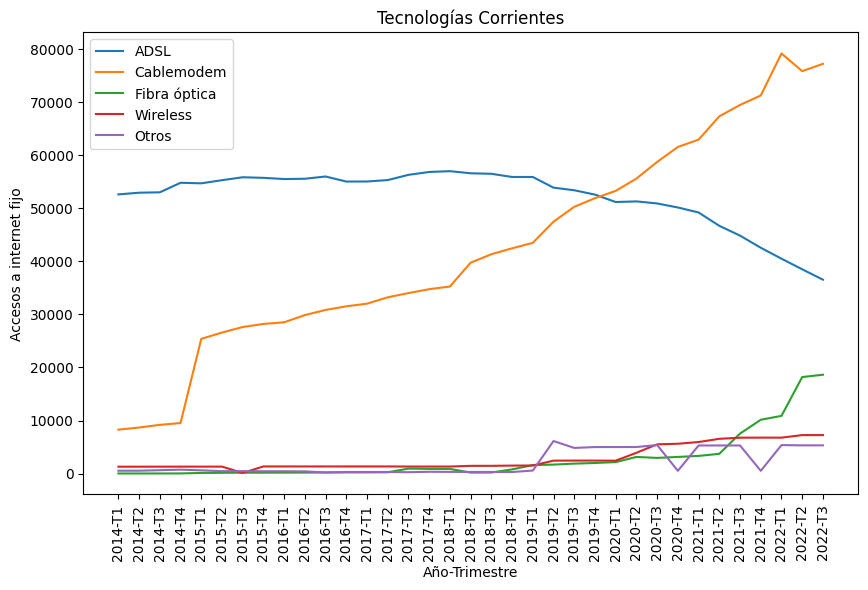

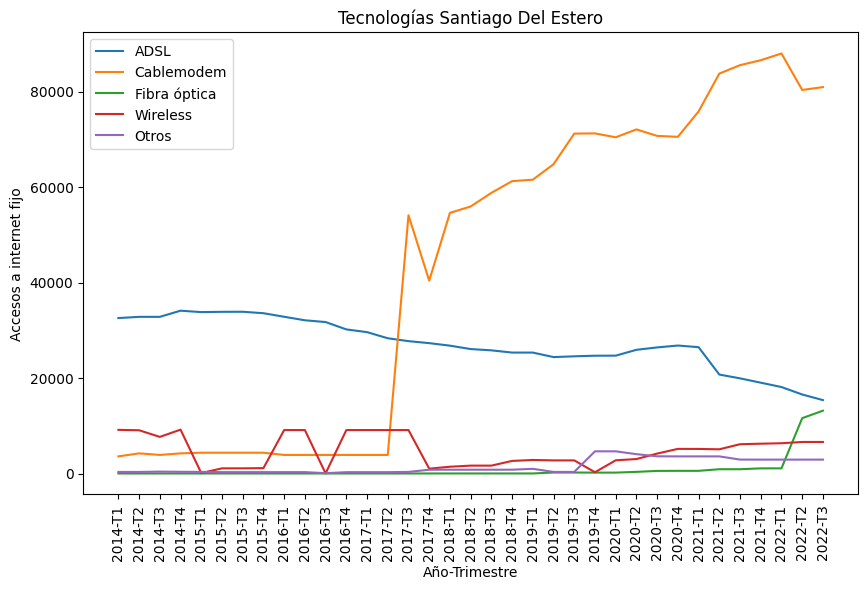

In [47]:
grafico_evolucion(df_formosa_tec, columna_tec, 'Año-Trimestre', 'Accesos a internet fijo', 'Tecnologías Formosa')
grafico_evolucion(df_chaco_tec, columna_tec, 'Año-Trimestre', 'Accesos a internet fijo', 'Tecnologías Chaco')
grafico_evolucion(df_corrientes_tec, columna_tec, 'Año-Trimestre', 'Accesos a internet fijo', 'Tecnologías Corrientes')
grafico_evolucion(df_santiago_tec, columna_tec, 'Año-Trimestre', 'Accesos a internet fijo', 'Tecnologías Santiago Del Estero')

En los gráficos se observa cómo el ADSL está cayendo. Y el cablemodem junto con la fibra óptica están tomando relevancia.

También se ve que en Formosa la adopción de tecnologías de alta velocidad, si bien está creciendo, está más retrasado respecto al resto.

Nótese que mientras el resto de las provincias están entre 90.000 y 120.000 accesos sumando Cablemodem y Fibra Óptica, Formosa apenas va por 35.000 accesos al 3° trimestre del 2022 

*Comparemos todas las provincias*

In [48]:
tecnologias

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
816,2014,1,Buenos Aires,1567685,1000879,120960,16528,33824,2.739.876
817,2014,1,Capital Federal,445569,820161,17767,1866,14555,1.299.918
818,2014,1,Catamarca,24126,46,17,0,430,24.232
819,2014,1,Chaco,52971,9497,30,0,580,62.556
820,2014,1,Chubut,51066,539,866,10776,6974,70.221
...,...,...,...,...,...,...,...,...,...
19,2022,3,Santa Cruz,10170,24047,10815,3896,5820,49.510
20,2022,3,Santa Fe,183740,426255,215189,43079,19547,887.810
21,2022,3,Santiago Del Estero,15385,80937,13170,6618,2922,119.032
22,2022,3,Tierra Del Fuego,12754,39963,403,1250,6510,53.896


In [49]:
#Filtro por último trimestre
filtro_tec = (tecnologias['Año'] == '2022') & (tecnologias['Trimestre'] == '3')
df_2022T3_tec = tecnologias.loc[filtro_tec]

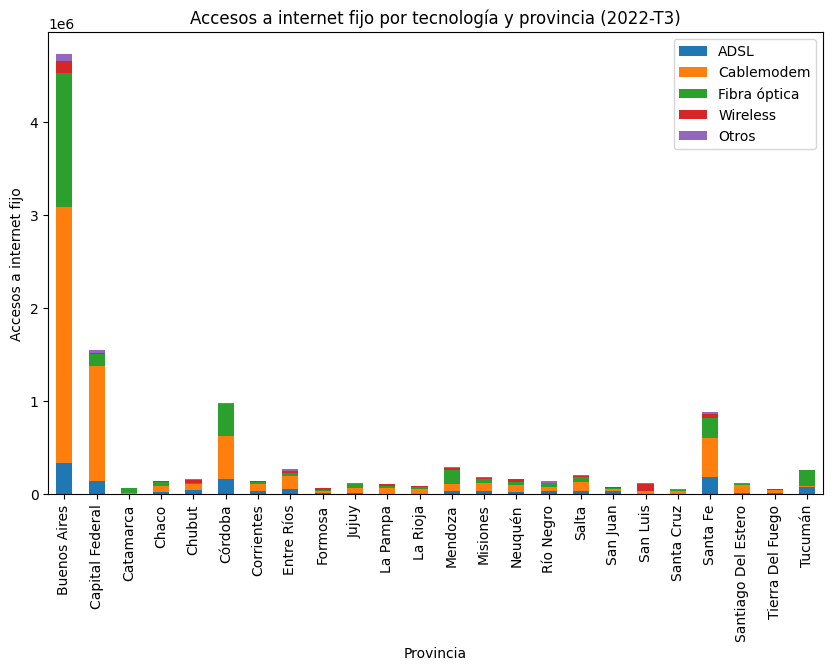

In [50]:
ax = df_2022T3_tec.set_index('Provincia')[columna_tec].plot(kind='bar', stacked=True, figsize=(10,6))
ax.set_ylabel('Accesos a internet fijo')
ax.set_title('Accesos a internet fijo por tecnología y provincia (2022-T3)')

plt.show()

Se ve claramente el predominio de las tecnologías de alta velocidad (Cablemoden y Fibra Óptica) en los distritos más avanzados y con más cantidad de accesos a internet. Por lo cual se puede considerar como un tendencia a ser considerada en nuevos mercados.

**=> Calidad: reclamos**

Todos los Dataset disponibles tienen datos sólo de 5 meses en el año 2023.

No tienen suficiente extención para hacer un análisis de la calidad del servicio en los últimos años.

In [51]:
reclamos_internet = pd.read_csv(r'Datasets\Denuncias y Reclamos_Reclamos mensuales por tipo de servicio.csv')
reclamos_internet.head()

,Año,Mes,Telefonía Fija,Internet Fijo,Comunicaciones Moviles,TV por cable,Total mensual
0,2023,1,1.161,694,257,144,2.256
1,2023,2,1.033,657,257,145,2.092
2,2023,3,1.265,819,366,171,2.621
3,2023,4,848.000,468,257,107,1.680
4,2023,5,765.000,465,249,98,1.577


In [52]:
reclamos_internet.info()
#tiene muy pocos datos para ser considerado en un análisis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     5 non-null      int64  
 1   Mes                     5 non-null      int64  
 2   Telefonía Fija          5 non-null      float64
 3   Internet Fijo           5 non-null      int64  
 4   Comunicaciones Moviles  5 non-null      int64  
 5   TV por cable            5 non-null      int64  
 6   Total mensual           5 non-null      float64
dtypes: float64(2), int64(5)
memory usage: 412.0 bytes


In [53]:
reclamos_motivo = pd.read_csv(r'Datasets\Denuncias y Reclamos_Reclamos mensuales recibidos por motivo de reclamo.csv') #faltaría distinguir qué servicio: internet, telefono, tv...
reclamos_motivo.head()

,Año,Mes,Problemas técnicos,Facturación,Gestiones administrativas,Otros,Total mensual
0,2023,1,1240,504,407,105,2256
1,2023,2,1141,467,393,91,2092
2,2023,3,1385,635,433,168,2621
3,2023,4,840,440,294,106,1680
4,2023,5,769,428,289,91,1577


In [54]:
reclamos_motivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Año                        5 non-null      int64
 1   Mes                        5 non-null      int64
 2   Problemas técnicos         5 non-null      int64
 3   Facturación                5 non-null      int64
 4   Gestiones administrativas  5 non-null      int64
 5   Otros                      5 non-null      int64
 6   Total mensual              5 non-null      int64
dtypes: int64(7)
memory usage: 412.0 bytes


In [55]:
reclamos_operador = pd.read_csv(r'Datasets\Denuncias y Reclamos_Reclamos por operador y motivo de reclamo.csv') #Acá podría filtar por los proveedores de internet
reclamos_operador.head()

,Año,Mes,Motivo de Reclamo,Operador,Cantidad
0,2023,1,Facturación,AMX Argentina S.A. (Claro),16
1,2023,1,Facturación,DIRECTV Argentina S.A.L,4
2,2023,1,Facturación,Fibertel S.A. (TCI),8
3,2023,1,Facturación,Movistar - Telefonica Moviles Argentina S.A.,24
4,2023,1,Facturación,Otros,25


In [56]:
reclamos_operador.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Año                184 non-null    int64 
 1   Mes                184 non-null    int64 
 2   Motivo de Reclamo  184 non-null    object
 3   Operador           184 non-null    object
 4   Cantidad           184 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.3+ KB


In [57]:
reclamos_operador['Año'].unique()

array([2023], dtype=int64)

In [58]:
reclamos_operador['Mes'].unique()


array([1, 2, 3, 4, 5], dtype=int64)

**=> Análisis de ingresos en el sector de internet**

***ETL***

In [59]:
ingresos = pd.read_csv(r'Datasets\Acceso a Internet_Ingresos por la operación del servicio de Internet fijo.csv') #Acá podría filtar por los proveedores de internet
ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67.055.930,Jul-Sept 2022
1,2022,2,60.335.724,Abr-Jun 2022
2,2022,1,55.589.997,Ene-Mar 2022
3,2021,4,45.467.887,Oct-Dic 2021
4,2021,3,42.999.944,Jul-Sept 2021


In [60]:
ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        35 non-null     int64 
 1   Trimestre                  35 non-null     int64 
 2   Ingresos (miles de pesos)  35 non-null     object
 3   Periodo                    35 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [61]:
# Convierto la columna Ingresos (miles de pesos) a int
ingresos['Ingresos (miles de pesos)'] = ingresos['Ingresos (miles de pesos)'].astype(str). str.replace('.','')
ingresos['Ingresos (miles de pesos)'] = pd.to_numeric(ingresos['Ingresos (miles de pesos)'], downcast='integer')

In [62]:
# Ordeno por Año y Trimestre
ingresos = ingresos.sort_values(by= ['Año', 'Trimestre'], ascending=True)

In [63]:
ingresos['Ingresos (miles de pesos)'].describe()

count    3.500000e+01
mean     2.058845e+07
std      1.774214e+07
min      2.984054e+06
25%      6.235543e+06
50%      1.431947e+07
75%      3.204996e+07
max      6.705593e+07
Name: Ingresos (miles de pesos), dtype: float64

***EDA***

In [64]:
def grafico_evolucion_simple(columna_año, columna_trim, columna_objetivo, eje_x, eje_y, titulo):
    # Crear el gráfico
    plt.figure(figsize=(10,6))

    plt.plot(columna_año.astype(str) + '-T' + columna_trim.astype(str), columna_objetivo)

    # Personalizar el gráfico
    plt.xlabel(eje_x)
    plt.ylabel(eje_y)
    plt.title(titulo)

    plt.xticks(rotation=90)

    # Mostrar gráfico
    return plt.show()

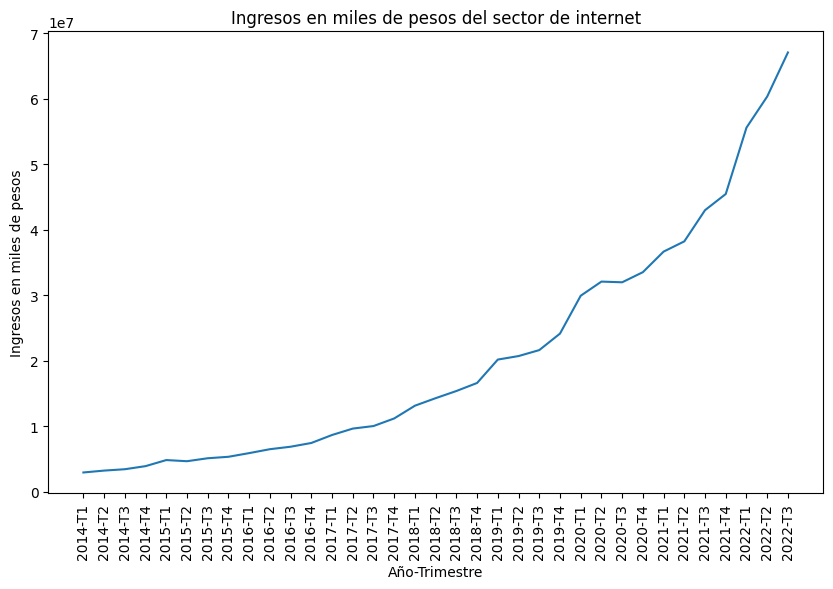

In [65]:
grafico_evolucion_simple(ingresos['Año'], ingresos['Trimestre'], ingresos['Ingresos (miles de pesos)'], 'Año-Trimestre', 'Ingresos en miles de pesos', 'Ingresos en miles de pesos del sector de internet')

Es evidente que los ingresos en el sector de internet van en constante y pronunciado aumento, también influenciado por el avance a nivel muncial de tecnologías y estilos de vida vinculados con el servicio de internet.

Si tuvieramos los datos por provincia, hubiese sido interesante desarrollar un análisis al respecto.

**=> Análisis macroeconómico**

In [66]:
macro = pd.read_csv(r'Datasets\Acceso a Internet_Indicadores macroeconómicos.csv') 
macro.head()

,Año,Trimestre,IPC US,IPC AR,USDARS oficial,USDARS blue,PBI millones
0,2013,1,232773,298,"5,00","9,00",2.888.981
1,2013,2,233504,309,"5,00","9,00",3.387.811
2,2013,3,234149,331,"6,00","10,00",3.436.547
3,2013,4,233049,351,"6,00","11,00",3.679.896
4,2014,1,236293,402,"8,00","11,00",3.917.649


In [67]:
macro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Año             22 non-null     int64 
 1   Trimestre       22 non-null     int64 
 2   IPC US          22 non-null     int64 
 3   IPC AR          22 non-null     int64 
 4   USDARS oficial  22 non-null     object
 5   USDARS blue     22 non-null     object
 6   PBI millones    21 non-null     object
dtypes: int64(4), object(3)
memory usage: 1.3+ KB


In [71]:
# Convierto la columna Ingresos (miles de pesos) a float
macro['PBI millones'] = macro['PBI millones'].replace('nan', 0)
macro['PBI millones'] = macro['PBI millones'].astype(str).str.replace('.','')
macro['PBI millones'] = pd.to_numeric(macro['PBI millones'], downcast='float')

In [72]:
macro['USDARS blue'] = macro['USDARS blue'].astype(str).str.replace(',','.')
macro['USDARS blue'] = pd.to_numeric(macro['USDARS blue'], downcast='float')

In [73]:
macro['USDARS oficial'] = macro['USDARS oficial'].astype(str).str.replace(',','.')
macro['USDARS oficial'] = pd.to_numeric(macro['USDARS oficial'], downcast='float')

In [74]:
macro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Año             22 non-null     int64  
 1   Trimestre       22 non-null     int64  
 2   IPC US          22 non-null     int64  
 3   IPC AR          22 non-null     int64  
 4   USDARS oficial  22 non-null     float32
 5   USDARS blue     22 non-null     float32
 6   PBI millones    22 non-null     float32
dtypes: float32(3), int64(4)
memory usage: 1.1 KB


In [75]:
macro.describe()

,Año,Trimestre,IPC US,IPC AR,USDARS oficial,USDARS blue,PBI millones
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.00
mean,2015.272727,2.409091,239811.500000,657.000000,11.863636,15.227273,6476446.00
std,1.638287,1.140555,5470.373764,268.532697,5.276141,4.699866,3181086.75
min,2013.000000,1.000000,232773.000000,298.000000,5.000000,9.000000,0.00
25%,2014.000000,1.250000,236162.500000,440.000000,8.000000,13.000000,4109612.50
50%,2015.000000,2.000000,238237.500000,602.500000,9.500000,15.000000,6086605.00
75%,2016.750000,3.000000,243208.750000,868.250000,15.750000,16.000000,8818823.75
max,2018.000000,4.000000,251989.000000,1169.000000,24.000000,29.000000,11975804.00


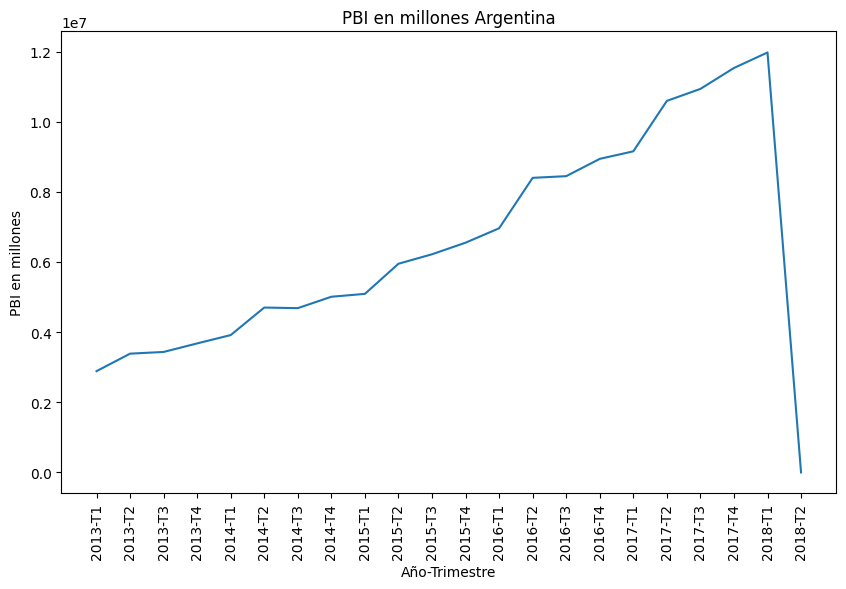

In [76]:
grafico_evolucion_simple(macro['Año'], macro['Trimestre'], macro['PBI millones'], 'Año-Trimestre', 'PBI en millones', 'PBI en millones Argentina')

Los datos son muy viejos como para sacar conclusiones

**CONCLUSIÓN FINAL**

El análisis del sistema de telecomunicaciones se realizó haciendo foco en el sector de Servicios de Internet, con el objetivo de detectar posibles oportunidades de crecimiento. Haciendo hincapié también, en sus características particulares y la evolución de sus tendencias con la finalidad de plantear soluciones de calidad a los potenciales clientes.

**Accesos a internet**

Un análisis en la cantidad de accesos por cada 100 hogares evidencia que un crecimiento en los últimos 8 años que duplicó la cantidad de hogares conectados al servicio.

Es importante destacar que el 70% de los hogares ya cuenta con conexión a internet. Un porcentaje relativamente alto que haría pensar que ya es tarde para entrar cómo proveedor del servicio.

Sin embargo, analisis más minucioso a nivel provincial revela que hay distritos con una accesibilidad por debajo del 40%, lo cual podría suponer una buena oportunidad de incursionar en estos mercados en una etapa relativamente temprana.

Estas provincias son: Santa Cruz, Formosa, Chaco, Santiago Del Estero y Corrientes. Destacar también que, salvo Santa Cruz, el resto son provincias muy cercanas con lo que se podría simplificar la expansión interprovincial del servicio.

**Calidad del servicio**

A nivel nacional, el estudio sobre los datos de velocidades que consumen los usuarios señala un tendencia hacia velocidades cada vez mayores (+30 Mbps).

En contrapartida, velocidades por debajo de 30 Mbps son cada vez menos aceptadas por el mercado.

Así mismo, un zoom en las provincias detectadas con potencial de crecimiento, muestra la misma tendencia en Chaco y Corrientes, en donde se observa un salto pronunciado en la cantidad de accesos durante el año 2019, pasando de menos de 10.000 accesos a más de 50.000 el caso de Corrientes y más de 80.000 para Chaco en 2022.

Sin embargo, en Formosa y Santiago Del Estero aún no se dio esa explosión y continúan predominando las velocidades bajas.

**Tecnologías**

En línea con lo anterior, el uso de tecnologías de Cable Modem y Fibra Óptica, asociadas a las altas velocidades, va en aumento.

En el caso de la Fibra Óptica se demuestra un aumento significativo de las curva de crecimiento a partir del 2019. Esto guarda relación con lo examinado en el apratado anterior.

Si indagamos la situación en las provincias al 3° trimestre del año 2022, en aquellas con mayor penetración, la alta velocidad es ampliamente dominante.

Posando la lupa en las provincias con potencial de crecimiento, se evidencia que el uso de la tecnología ADSL (para velocidades inferiores a 24), que predominaba el mercado hasta el año 2019, está sufriendo un gran descenso. Por el contrario, el Cable Modem y la Fibra Óptica tomaron relevancia desde entonces.

Es de notar, además, que en Formosa la adopción de mejores tecnologías tiene un retraso respecto del resto puesto que el salto importante de estas se da recién en 2022.

**Ingresos del sector internet**

Es obvio que los ingresos en el sector de internet van en constante y pronunciado aumento, también influenciado por el avance a nivel mundial de tendencias, tecnologías y estilos de vida vinculados con el servicio de internet.